#Задача:

from sklearn.datasets import fetch_lfw_people
1. Получение данных.
    * Визуализация первых десяти изображений.
3. Кластеризация и оценка качества.
    * Визуализизация центров кластеров.
    * Анализ зависимости метрик от числа кластеров.
4. Снижение размерности признакового пространства.
5. Выводы.

In [1]:
# Получение данных
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=53)
print(len(faces.target_names))
print(faces.images.shape)

10
(1456, 62, 47)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

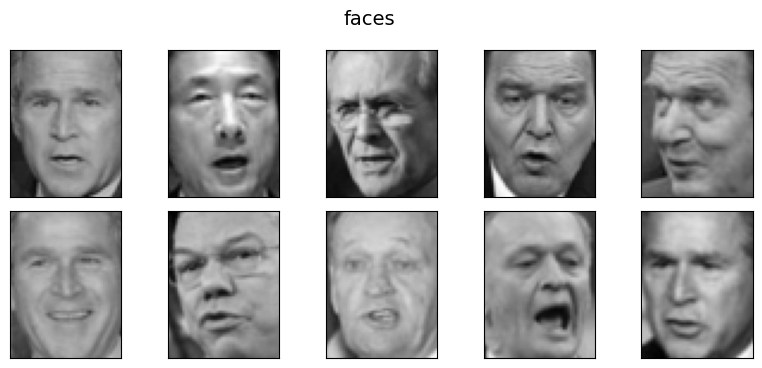

In [3]:
# Визуализация 10 изображений
def plot_digits(data, suptitle):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle(suptitle, fontsize=14)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i],
                  cmap='gray', clim=(0, 1))
                  
plot_digits(faces.images, "faces")

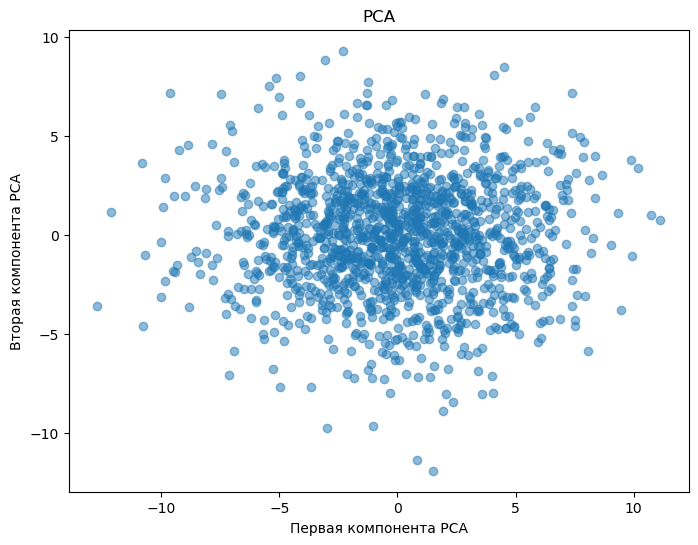

In [15]:
# Снижение размерности с помощью PCA 
pca = PCA(n_components=50)
X_pca = pca.fit_transform(faces.data)
# Визуализация распределения данных после PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA')
plt.xlabel('Первая компонента PCA')
plt.ylabel('Вторая компонента PCA')
plt.show()

In [20]:
# Применение TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Кластеризация с помощью KMeans
kmeans = KMeans(n_clusters=15, random_state=42, n_init=100)
kmeans.fit(X_tsne)
labels = kmeans.labels_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


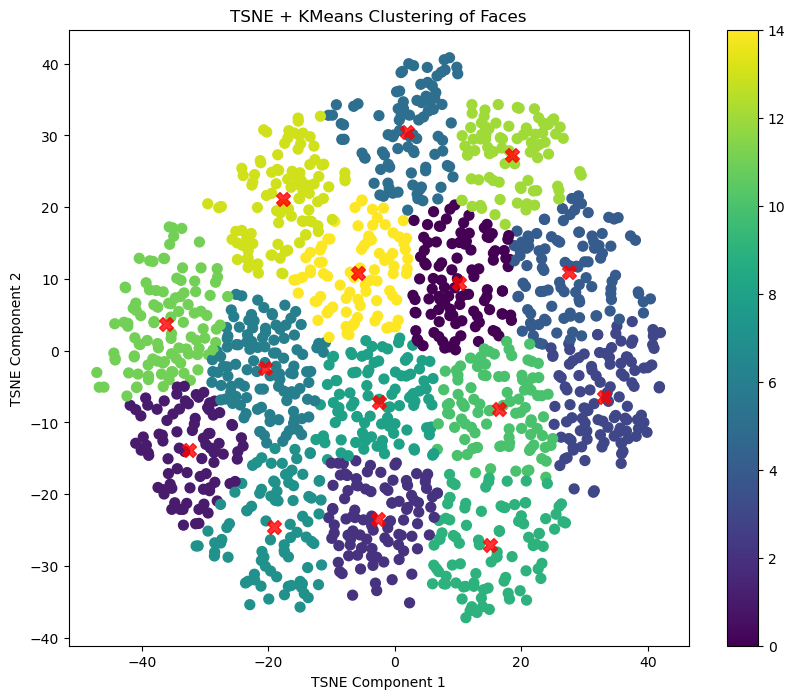

In [24]:
# Визуализация кластеров KMeans
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter)
plt.title('TSNE + KMeans Clustering of Faces')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')

# Визуализация центров кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, alpha=0.8)
plt.show()

In [53]:
# Метрики.
km_scores= []
km_silhouette = []
db_score = []


from sklearn.metrics import silhouette_score, davies_bouldin_score
X_scaled=faces.data
for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 2: -82627.84375
Silhouette score for number of cluster(s) 2: 0.11435423046350479
Davies Bouldin score for number of cluster(s) 2: 2.5396347859390134
Score for number of cluster(s) 3: -77128.78125
Silhouette score for number of cluster(s) 3: 0.09268154203891754
Davies Bouldin score for number of cluster(s) 3: 2.5645384828424516


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 4: -73730.5078125
Silhouette score for number of cluster(s) 4: 0.07553400844335556
Davies Bouldin score for number of cluster(s) 4: 2.552707459908879


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 5: -72055.609375
Silhouette score for number of cluster(s) 5: 0.061622872948646545
Davies Bouldin score for number of cluster(s) 5: 2.9696567854888336


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 6: -70531.4921875
Silhouette score for number of cluster(s) 6: 0.05059491842985153
Davies Bouldin score for number of cluster(s) 6: 2.99353532942311


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 7: -68955.015625
Silhouette score for number of cluster(s) 7: 0.05427073314785957
Davies Bouldin score for number of cluster(s) 7: 2.9187136771835687


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 8: -67893.625
Silhouette score for number of cluster(s) 8: 0.046260591596364975
Davies Bouldin score for number of cluster(s) 8: 2.8073963542568023


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 9: -67072.15625
Silhouette score for number of cluster(s) 9: 0.042044494301080704
Davies Bouldin score for number of cluster(s) 9: 2.8743542701975437


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 10: -66179.9453125
Silhouette score for number of cluster(s) 10: 0.04022345319390297
Davies Bouldin score for number of cluster(s) 10: 3.010377768094855


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 11: -65083.09765625
Silhouette score for number of cluster(s) 11: 0.044716767966747284
Davies Bouldin score for number of cluster(s) 11: 2.8331512879315324


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 12: -64471.984375
Silhouette score for number of cluster(s) 12: 0.044972777366638184
Davies Bouldin score for number of cluster(s) 12: 2.8459233551250143


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 13: -63598.99609375
Silhouette score for number of cluster(s) 13: 0.03787349909543991
Davies Bouldin score for number of cluster(s) 13: 2.921498293127934


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Score for number of cluster(s) 14: -62947.40625
Silhouette score for number of cluster(s) 14: 0.04477202147245407
Davies Bouldin score for number of cluster(s) 14: 2.7517327296366605


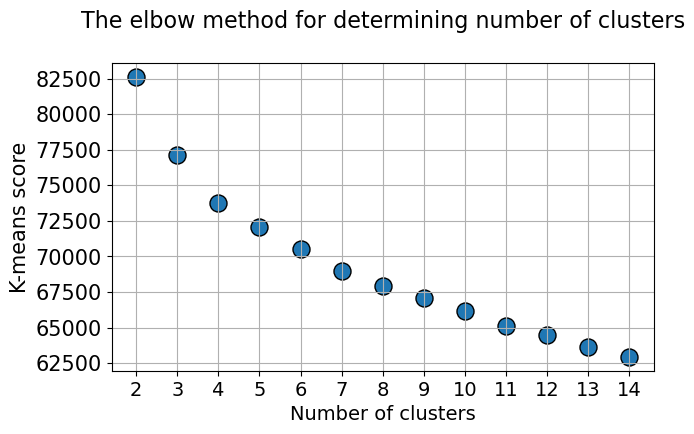

In [54]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

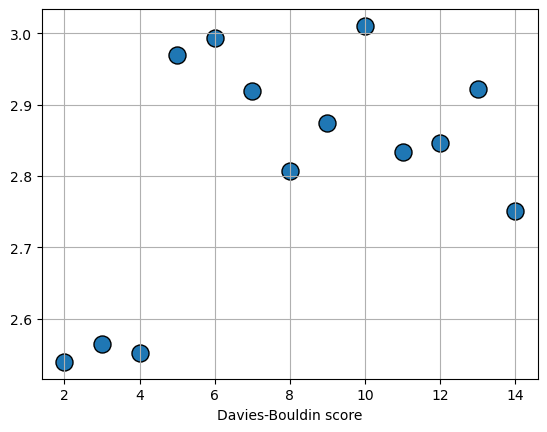

In [55]:
plt.scatter(x=[i for i in range(2,15)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

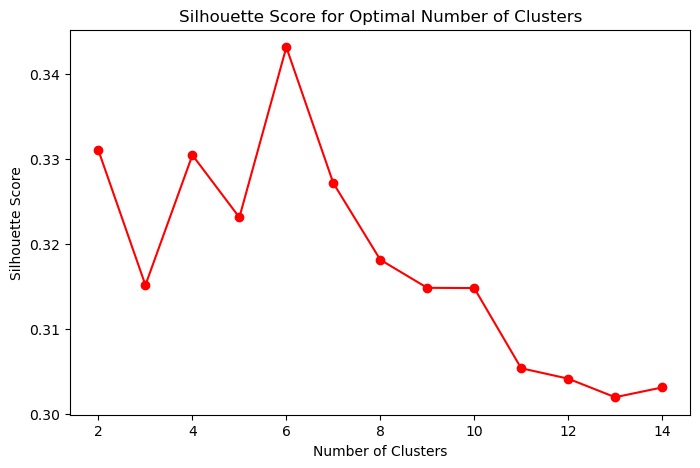

Optimal number of clusters based on Silhouette Score: 6


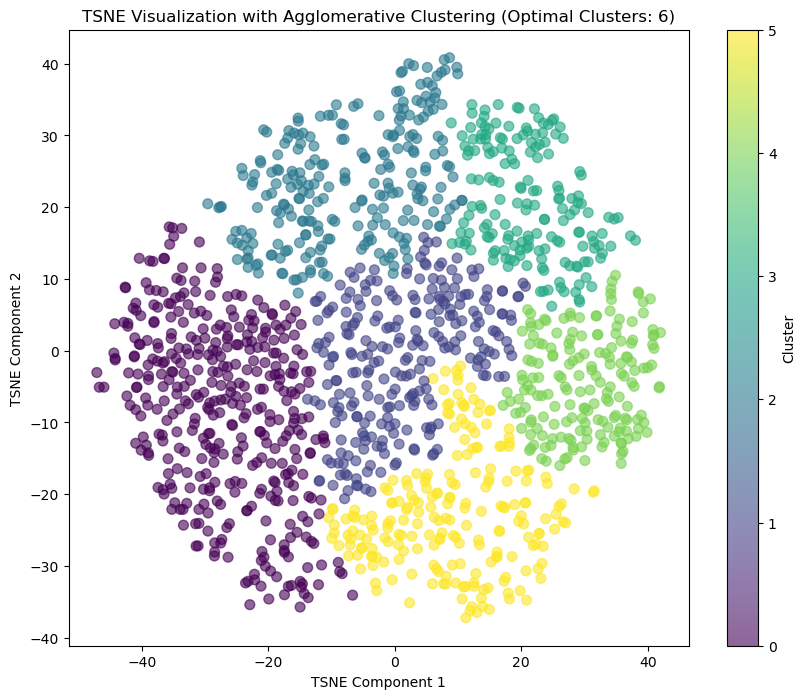

In [68]:
# Кластеризация с использованием AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# Определение оптимального количества кластеров с помощью силуэтного коэффициента
silhouette_scores = []

for clusters in range(2, 15):
    agglo = AgglomerativeClustering(n_clusters=clusters)
    labels = agglo.fit_predict(X_tsne)
    silhouette_scores.append(silhouette_score(X_tsne, labels))

# Визуализация силуэтного коэффициента
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

# Выбор оптимального количества кластеров на основе силуэтного коэффициента
optimal_clusters = range(2, 15)[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

# Кластеризация с оптимальным количеством кластеров
agglo = AgglomerativeClustering(n_clusters=optimal_clusters)
labels = agglo.fit_predict(X_tsne)

# Визуализация распределения данных после TSNE с разными цветами кластеров
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title(f'TSNE Visualization with Agglomerative Clustering (Optimal Clusters: {optimal_clusters})')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

# Выводы:

1. Получили и визуализировали первые 10 изображений из fetch_lfw_people.
2. Выполнили кластеризацию KMeans и AgglomerativeClustering.
3. Визуализировали кластеры с центрами.
4. Davies-Bouldin score в KMeans указал правильное количество кластеров(10), в то время как silhouette_scores в AgglomerativeClustering указал на 6 кластеров.